# Load Imports and Data

In [3]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

from model.model import *
from model.plotting import *
from preprocess import *

%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
pickle_data(preprocess(alldat, verbose = False))

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...
Processed Data Dumped


# Preprocess Data
Preprocess data using the preprocessing function and split into train and test sets. Verbosity sets whether or not to print out at the end

In [4]:
train, test = train_test_split(load_processed_data())

Processed Data loaded


In [6]:
train.head(3).T

,0,1,2
session,0,0,0
session_type,train,train,train
mouse_name,Cori,Cori,Cori
trial_number,0,1,2
go_trial,True,True,True
gocue,1027.22,874.414,825.213
response_time,1150.2,1399.5,949.291
latency,122.987,525.089,124.078
mouse_resp,1,-1,1
wheel_velocity,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0..."


## Change in Latency

In [7]:
# calculate new features
train['fut_lat_chg'] = train.apply(lambda row: row['fut_latency'] - row['latency'], axis=1)
train['mean_wheel_velocity'] = train['wheel_velocity'].apply(lambda x: np.mean(np.abs(x)))
train['diff_chg'] = train.apply(lambda row: (row['fut_difficulty'] - row['pres_difficulty']), axis=1)

In [8]:
# Subsetting # 1
only_go = train[train['go_trial']][train['fut_go_trial']]

c:\users\xiw019\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


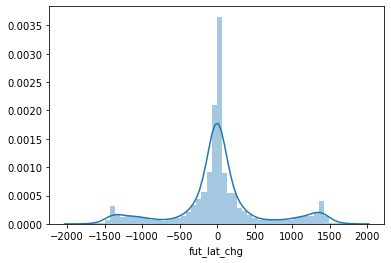

In [13]:
sns.distplot(only_go['fut_lat_chg'])

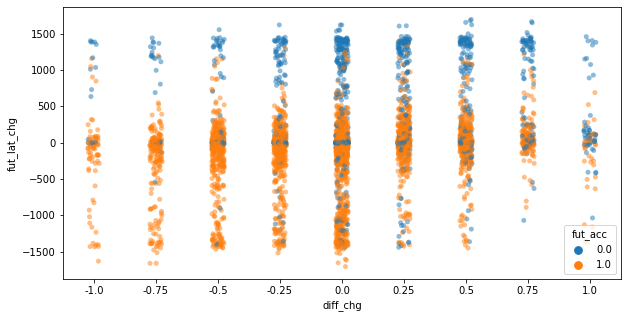

In [14]:
plt.figure(figsize=(10,5))
sns.stripplot(x='diff_chg', y='fut_lat_chg', hue='fut_acc', data=only_go, jitter=True, alpha = 0.5)

Able to split the trimodal distribution a little bit more, with future accuracy splitting the left bimodal and right bimodal. Difficulty is not helpful in splitting the distribution.

## Nonparametric Statistics

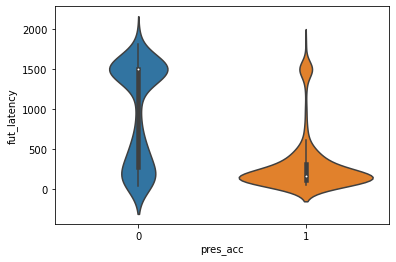

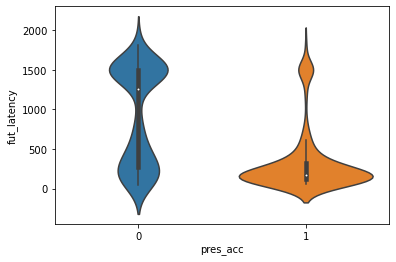

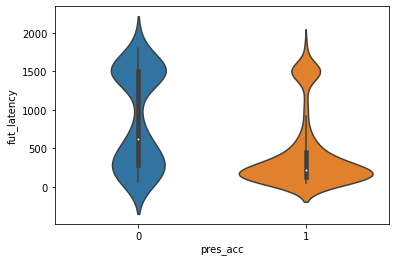

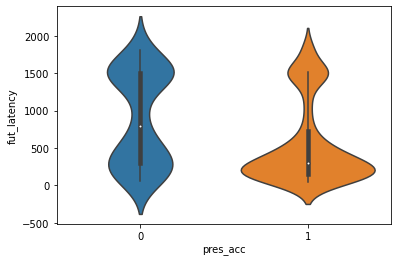

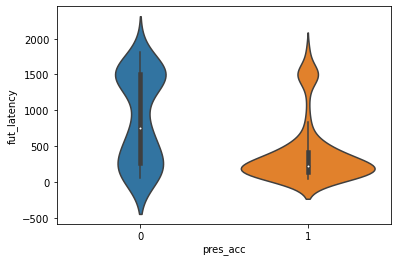

In [24]:
for i in np.arange(0, 1.25, 0.25):
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(only_go, y = "fut_latency", features = ["pres_acc"], filter_= f, hue = 'pres_acc')

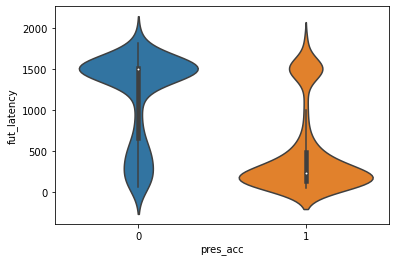

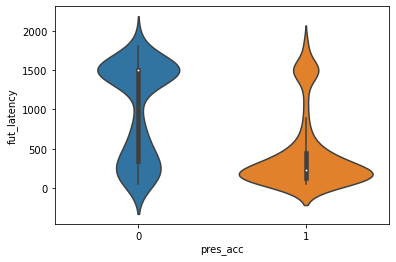

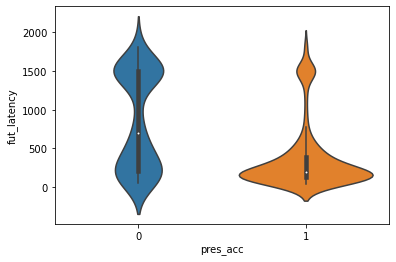

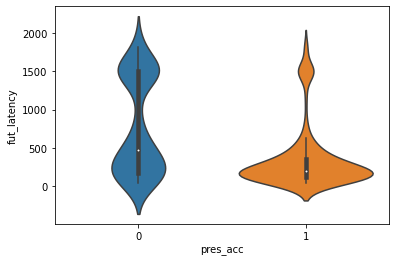

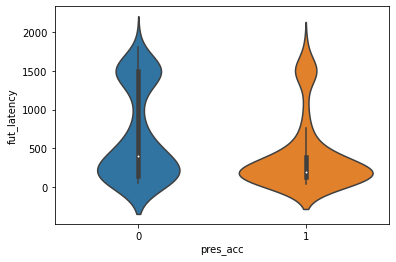

In [9]:
for dif in np.unique(train['pres_difficulty']):
    plt.figure()
    sns.violinplot(x='pres_acc', y='fut_latency', data=only_go[only_go['pres_difficulty'] == dif])

In [29]:
binary_test(only_go, 'pres_acc', 'latency')

Variable of interst: pres_acc
Possible values: [0 1]
Difficulty: 0.0
        U-val       tail          p-val       RBC      CLES
MWU  302769.0  two-sided  3.997152e-149 -0.944972  0.972486
Difficulty: 0.25
        U-val       tail          p-val       RBC      CLES
MWU  197509.0  two-sided  3.480304e-112 -0.880268  0.940134
Difficulty: 0.5
        U-val       tail         p-val       RBC      CLES
MWU  226207.0  two-sided  2.909271e-72 -0.694384  0.847192
Difficulty: 0.75
        U-val       tail         p-val       RBC      CLES
MWU  130607.0  two-sided  2.098696e-65 -0.725267  0.862633
Difficulty: 1.0
       U-val       tail     p-val       RBC     CLES
MWU  23604.0  two-sided  0.000001 -0.285621  0.64281


In [33]:
binary_test(only_go, 'pres_acc', 'fut_latency')

Variable of interst: pres_acc
Possible values: [0 1]
Difficulty: 0.0
        U-val       tail         p-val       RBC      CLES
MWU  251225.0  two-sided  4.899006e-64 -0.613856  0.806928
Difficulty: 0.25
        U-val       tail         p-val       RBC      CLES
MWU  157314.0  two-sided  1.172333e-37 -0.502113  0.751056
Difficulty: 0.5
        U-val       tail         p-val       RBC      CLES
MWU  192230.0  two-sided  4.764539e-30 -0.439882  0.719941
Difficulty: 0.75
        U-val       tail         p-val       RBC      CLES
MWU  105398.0  two-sided  2.519507e-20 -0.392266  0.696133
Difficulty: 1.0
       U-val       tail     p-val       RBC      CLES
MWU  22849.0  two-sided  0.000037 -0.244499  0.622249


In [31]:
binary_test(only_go, 'pres_acc', 'fut_lat_chg')

Variable of interst: pres_acc
Possible values: [0 1]
Difficulty: 0.0
       U-val       tail         p-val       RBC      CLES
MWU  98079.0  two-sided  2.389505e-24  0.369946  0.684973
Difficulty: 0.25
       U-val       tail         p-val       RBC      CLES
MWU  59016.0  two-sided  7.190873e-29  0.436486  0.718243
Difficulty: 0.5
       U-val       tail         p-val       RBC      CLES
MWU  94777.0  two-sided  5.902712e-14  0.290081  0.645041
Difficulty: 0.75
       U-val       tail         p-val       RBC      CLES
MWU  50788.0  two-sided  9.163049e-15  0.329111  0.664555
Difficulty: 1.0
       U-val       tail     p-val       RBC      CLES
MWU  16687.0  two-sided  0.124314  0.091122  0.545561


## Linear Regression

In [39]:
cont_test(only_go, 'latency', 'fut_latency', method='spearman')

Variable of interst: latency & fut_latency
Difficulty: 0.0
             n         r         CI95%        r2   adj_r2         p-val  power
spearman  1232  0.426159  [0.38, 0.47]  0.181611  0.18028  1.569922e-55    1.0
Difficulty: 0.25
            n         r         CI95%        r2    adj_r2         p-val  power
spearman  962  0.395657  [0.34, 0.45]  0.156544  0.154785  2.093262e-37    1.0
Difficulty: 0.5
             n        r         CI95%       r2    adj_r2         p-val  power
spearman  1194  0.32746  [0.28, 0.38]  0.10723  0.105731  3.064428e-31    1.0
Difficulty: 0.75
            n         r        CI95%       r2    adj_r2         p-val  power
spearman  818  0.340706  [0.28, 0.4]  0.11608  0.113911  1.111906e-23    1.0
Difficulty: 1.0
            n         r       CI95%        r2    adj_r2     p-val    power
spearman  386  0.202344  [0.1, 0.3]  0.040943  0.035935  0.000062  0.98031


In [ ]:
pingouin.corr(x, y, tail='two-sided', method='pearson')a

## Multilinear Regression

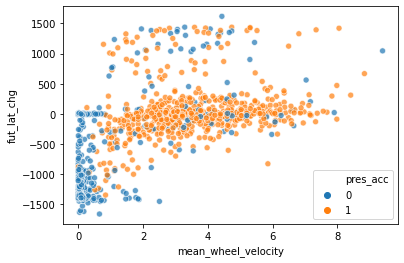

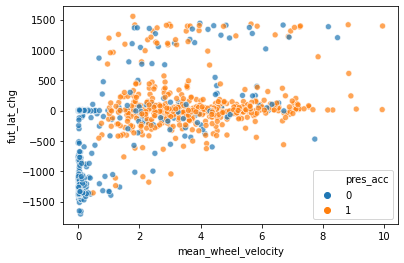

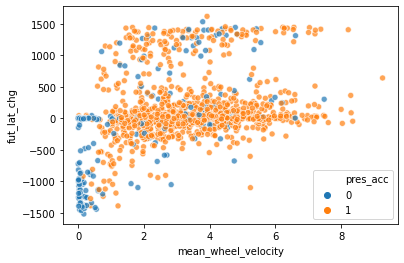

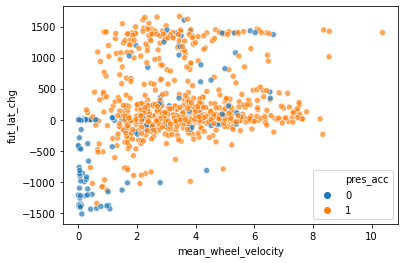

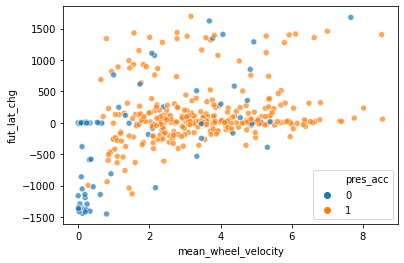

In [16]:
for i in np.arange(0, 1.25, 0.25):
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y = "fut_lat_chg", features = ["mean_wheel_velocity"], filter_= f, hue = 'pres_acc')

In [17]:
data = only_go
data = data[['pres_acc', 'fut_lat_chg', 'mean_wheel_velocity']].dropna()
X = data[['pres_acc', 'mean_wheel_velocity']].to_numpy()
y = data[['fut_lat_chg']].to_numpy()
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.score(X,y)

0.16127215761471103

In [19]:
model.coef_

array([[169.09800247,  91.57995184]])

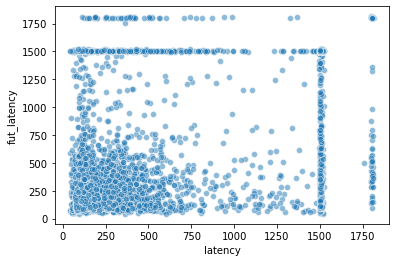

In [40]:
sns.scatterplot(x='latency', y='fut_latency', data = only_go, alpha = .5)

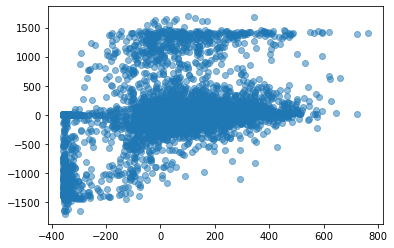

In [22]:
plt.scatter(model.predict(X), y, alpha=.5)

## Controlled Subset

In [104]:
train = train[train['go_trial']][train['fut_go_trial']]

In [105]:
train = train[train['pres_difficulty'] != 1]

In [108]:
train['mean_wheel_velocity'] = train['wheel_velocity'].apply(lambda x: np.mean(np.abs(x)))

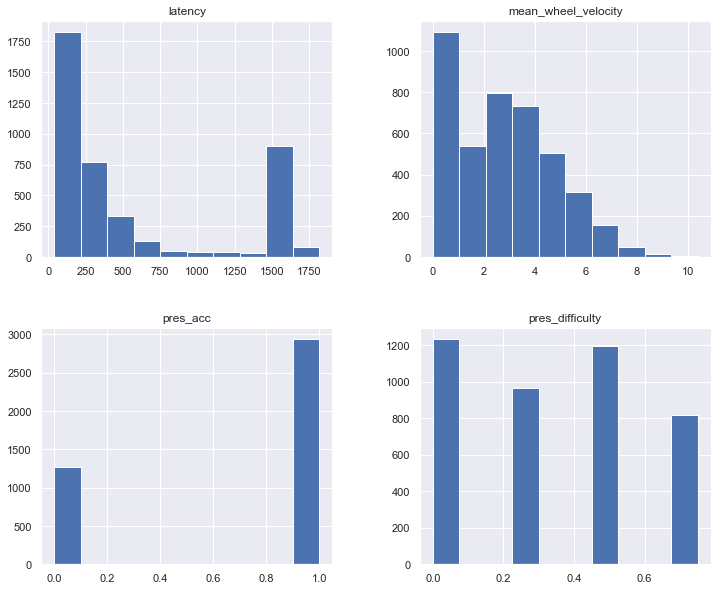

In [109]:
train[['latency', 'pres_acc', 'pres_difficulty', 'mean_wheel_velocity']].hist(figsize = (12,10));

In [110]:
def paired_trial(df):
    return df[df['pres_difficulty'] == df['fut_difficulty']]

In [111]:
df_paired = paired_trial(train)

In [124]:
df_paired[(df_paired['latency'] > 1500) & (df_paired['feedback_type'] == -1)]

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,pres_acc,response_time_diff,past_acc,past_latency,past_difficulty,fut_go_trial,fut_acc,fut_latency,fut_difficulty,mean_wheel_velocity
80,0.0,train,Cori,80.0,True,658.410370,2162.959168,1504.548798,0.0,"[-1.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0...",...,0,-1.211174,1.0,1510.412041,1.00,True,0.0,407.376449,0.25,0.352
93,0.0,train,Cori,93.0,True,1094.017315,2602.629848,1508.612533,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-1.267518,1.0,396.011143,0.50,True,1.0,473.498306,0.50,1.608
97,0.0,train,Cori,97.0,True,535.208406,2036.579848,1501.371443,0.0,"[4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, ...",...,0,-1.001087,1.0,520.345128,0.00,True,0.0,392.682671,0.25,0.192
99,0.0,train,Cori,99.0,True,569.208948,2082.616460,1513.407512,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-0.614082,0.0,392.682671,0.25,True,1.0,346.916233,0.25,0.124
103,0.0,train,Cori,103.0,True,1069.616926,2575.256212,1505.639286,0.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",...,0,-0.157689,1.0,84.435462,0.00,True,1.0,1410.351106,0.00,0.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,38.0,train,Theiler,275.0,True,614.284605,2116.162812,1501.878206,0.0,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0,...",...,0,-1.137138,1.0,112.721623,0.00,True,1.0,343.323694,0.75,1.020
10030,38.0,train,Theiler,323.0,True,618.153071,2118.393948,1500.240877,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,0,0.094991,0.0,1519.229634,0.50,True,0.0,1500.195462,0.00,0.088
10031,38.0,train,Theiler,324.0,True,713.189163,2213.384625,1500.195462,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-0.557737,0.0,1500.240877,0.00,True,0.0,1051.392490,0.00,0.048
10045,38.0,train,Theiler,338.0,True,794.096687,2297.502777,1503.406090,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,-1.138699,0.0,1500.116592,0.75,True,0.0,634.103872,0.25,0.112


## Higher Order Autocorrelation

In [126]:
import scipy.signal

In [127]:
xx = train['latency'].to_numpy()
corrs = sp.signal.correlate(xx,xx)

(3000.0, 6000.0)

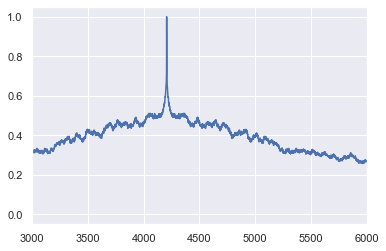

In [131]:
plt.plot(corrs/np.max(corrs))
plt.xlim([3000,6000])